In [14]:
from statsmodels.tsa.arima.model  import ARIMA
import numpy as np
import pandas as pd
from predict import predict, plot_timeline
from train import arima_train
from data_transformation import prep, split
import matplotlib.pyplot as plt



In [7]:
df = pd.read_excel('data/Zeitreihen_2Artikel.xlsx')  
df['year'] = df['DATUM'].dt.year

test = df[df['year'].isin([2017])]

train = df[~df['year'].isin([2017])]




https://www.kaggle.com/code/nageshsingh/stock-market-forecasting-arima

In [8]:
train = prep(train, type ='arima')
test = prep(test, type ='arima')


In [ ]:
model = pm.auto_arima(train['Artikel3'],  start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # 
                      seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=24312.549, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=23153.493, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=23640.140, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=24963.222, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=23153.944, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=23153.997, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=23155.940, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=23210.541, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.381 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1196
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -11573.747
Date:                Wed, 16 Aug 2023   AIC                          23153.493
Time:                       

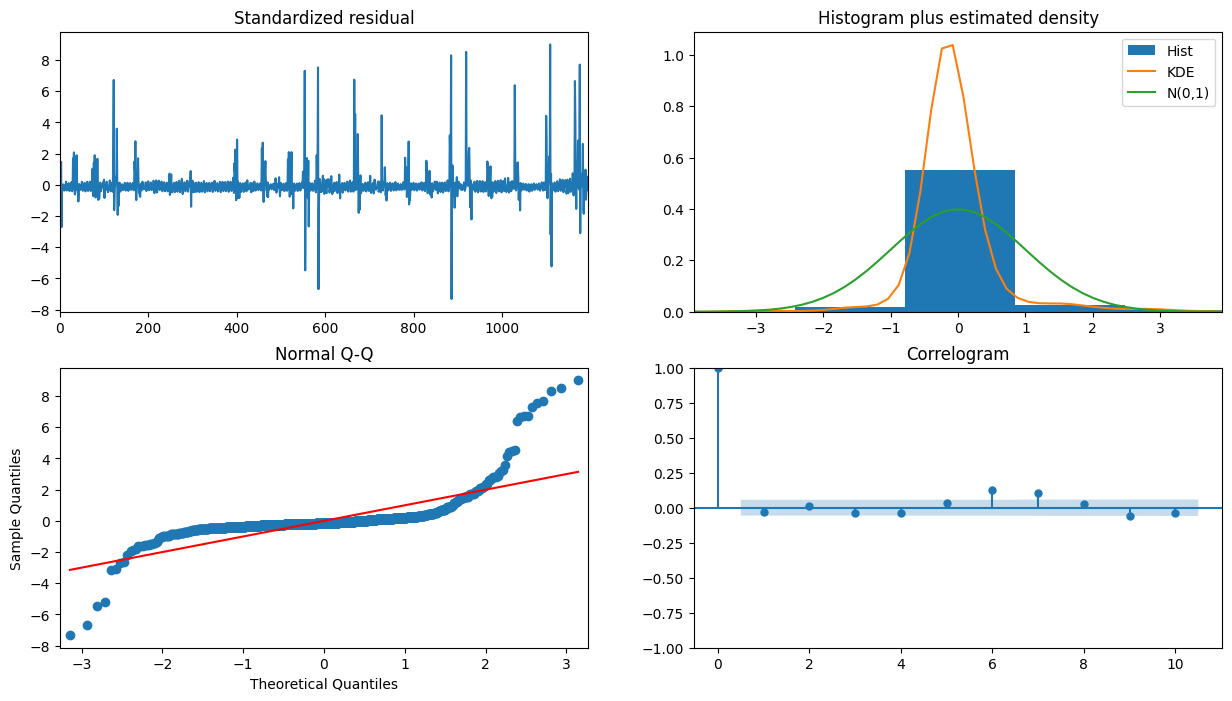

In [11]:
import pmdarima as pm


model = pm.auto_arima(train['Artikel3'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())
model.plot_diagnostics(figsize=(15,8))
plt.show()

In [17]:
model = ARIMA(train['Artikel3'], order=(1,0,0))  
model_fitted = model.fit()  
print(model_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:               Artikel3   No. Observations:                 1196
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -11573.746
Date:                Wed, 16 Aug 2023   AIC                          23153.491
Time:                        01:04:05   BIC                          23168.751
Sample:                             0   HQIC                         23159.241
                               - 1196                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5341.6225    682.159      7.830      0.000    4004.615    6678.630
ar.L1          0.7878      0.008     95.548      0.000       0.772       0.804
sigma2      1.489e+07      2.381   6.25e+06      0.0

/Users/ykinoshita/Documents/Projects/Rewe/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ykinoshita/Documents/Projects/Rewe/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ykinoshita/Documents/Projects/Rewe/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [19]:
model_fitted.forecast(321, alpha=0.05)  # 95% conf

/Users/ykinoshita/Documents/Projects/Rewe/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1196    4439.342346
1197    4630.825580
1198    4781.671958
1199    4900.505495
1200    4994.120003
           ...     
1512    5341.622519
1513    5341.622519
1514    5341.622519
1515    5341.622519
1516    5341.622519
Name: predicted_mean, Length: 321, dtype: float64

In [20]:
fc= model_fitted.forecast(321, alpha=0.05)  # 95% conf

/Users/ykinoshita/Documents/Projects/Rewe/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [35]:
fc_series = pd.Series(fc, index=test.index)


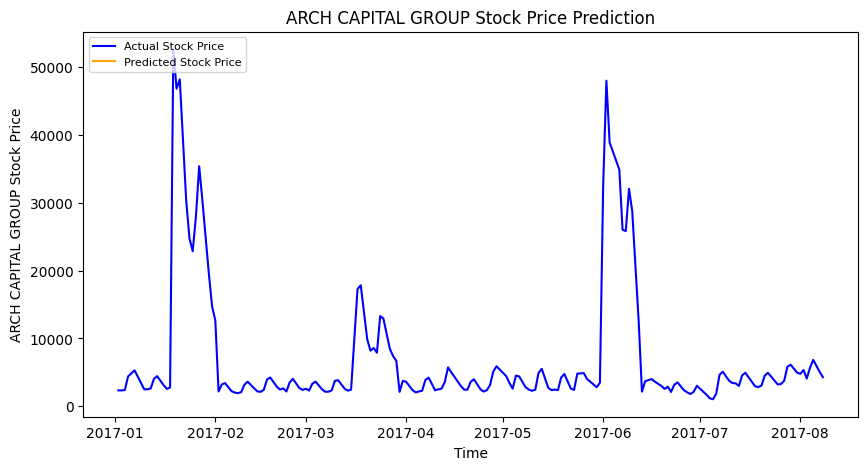

In [29]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
#plt.plot(train['Artikel3'], label='training data')
plt.plot(test['Artikel3'], color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')

plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

